## Reproduce Fig. 3b
Radar plot of deep mutational scanning stability data from natural and de-novo designed proteins (Rocklin 2017). Test set. Comparison with the best-performing baseline.

In [1]:
import os
import pandas as pd
import sys
import os
from subprocess import call

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
sys.path.append('../../')
from common.validation_tools import regr_datasets, subsets, metrics, reps, transfer_datasets, pearson
import common.validation_tools
from IPython.display import display, HTML
import numpy as np

import random
from scipy.stats import ttest_1samp
from sklearn.externals import joblib
from matplotlib.lines import Line2D

from common import plot_style_utils

random.seed(42)
np.random.seed(42)

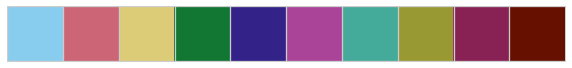

In [2]:
plot_style_utils.set_pub_plot_context()
sns.palplot(sns.color_palette())

In [3]:
# Now do the same but with pearson R
all_df = pd.read_pickle("../../data/for_supplement_regr_all_results_table_pearson_r_test.pkl")
all_df['rocklin_ssm2']  # gives ya series of dfs - one for each subset

phenotype_name
EEHEE_rd3_0037.pdb_ssm2_stability                               avg     stdev
all_a...
EEHEE_rd3_1498.pdb_ssm2_stability                               avg     stdev
RGN_f...
EEHEE_rd3_1702.pdb_ssm2_stability                               avg     stdev
all_f...
EEHEE_rd3_1716.pdb_ssm2_stability                               avg     stdev
RGN_a...
EHEE_0882.pdb_ssm2_stability                                    avg     stdev
all_1...
EHEE_rd2_0005.pdb_ssm2_stability                                avg     stdev
all_2...
EHEE_rd3_0015.pdb_ssm2_stability                                avg     stdev
all_1...
HEEH_rd2_0779.pdb_ssm2_stability                                avg     stdev
all_1...
HEEH_rd3_0223.pdb_ssm2_stability                                avg     stdev
all_f...
HEEH_rd3_0726.pdb_ssm2_stability                                avg     stdev
all_2...
HEEH_rd3_0872.pdb_ssm2_stability                                    avg     stdev
a...
HHH_0142.pdb_ssm2_stability 

In [4]:
all_df['rocklin_ssm2_nat_eng'].natural

,avg,stdev
RGN_avg_hidden,0.872961,0.025614
all_avg_hidden,0.871159,0.023986
avg_hidden,0.867748,0.027050
all_1900,0.857341,0.027267
all_final_cell,0.854799,0.027656
final_cell,0.848259,0.029848
RGN_final_cell,0.848153,0.027647
final_hidden,0.842285,0.028570
all_256,0.808317,0.024198
RGN,0.808069,0.025240


In [5]:
all_df['rocklin_ssm2_nat_eng'].engineered

,avg,stdev
all_final_cell,0.914616,0.006015
final_cell,0.913783,0.006359
all_avg_hidden,0.913355,0.006636
RGN_avg_hidden,0.911862,0.006911
all_1900,0.911763,0.006927
avg_hidden,0.911746,0.007101
RGN_final_cell,0.911397,0.007234
RGN,0.903911,0.007056
final_hidden,0.903674,0.008211
all_256,0.902858,0.007676


In [6]:
# Make a series of pearsonR for all_1900
dfs = all_df['rocklin_ssm2'][:-1] # drop the full
names = []
avgs = []
is_designed = []
for name,df in dfs.iteritems():
    print(name)
    if '.pdb' in name:
        is_designed.append(True)
    else:
        is_designed.append(False)
    name = name.split('_ssm2')[0].split(".")[0]
    print(name)
    names.append(name)
    avgs.append(df.avg.all_1900)
    
print(names)
print(avgs)
print(is_designed)

EEHEE_rd3_0037.pdb_ssm2_stability
EEHEE_rd3_0037
EEHEE_rd3_1498.pdb_ssm2_stability
EEHEE_rd3_1498
EEHEE_rd3_1702.pdb_ssm2_stability
EEHEE_rd3_1702
EEHEE_rd3_1716.pdb_ssm2_stability
EEHEE_rd3_1716
EHEE_0882.pdb_ssm2_stability
EHEE_0882
EHEE_rd2_0005.pdb_ssm2_stability
EHEE_rd2_0005
EHEE_rd3_0015.pdb_ssm2_stability
EHEE_rd3_0015
HEEH_rd2_0779.pdb_ssm2_stability
HEEH_rd2_0779
HEEH_rd3_0223.pdb_ssm2_stability
HEEH_rd3_0223
HEEH_rd3_0726.pdb_ssm2_stability
HEEH_rd3_0726
HEEH_rd3_0872.pdb_ssm2_stability
HEEH_rd3_0872
HHH_0142.pdb_ssm2_stability
HHH_0142
HHH_rd2_0134.pdb_ssm2_stability
HHH_rd2_0134
HHH_rd3_0138.pdb_ssm2_stability
HHH_rd3_0138
Pin1_ssm2_stability
Pin1
hYAP65_ssm2_stability
hYAP65
villin_ssm2_stability
villin
['EEHEE_rd3_0037', 'EEHEE_rd3_1498', 'EEHEE_rd3_1702', 'EEHEE_rd3_1716', 'EHEE_0882', 'EHEE_rd2_0005', 'EHEE_rd3_0015', 'HEEH_rd2_0779', 'HEEH_rd3_0223', 'HEEH_rd3_0726', 'HEEH_rd3_0872', 'HHH_0142', 'HHH_rd2_0134', 'HHH_rd3_0138', 'Pin1', 'hYAP65', 'villin']
[0.8677362723

In [7]:
cut = pd.DataFrame({"avg":avgs, "is_designed":is_designed},
    index=names
                  ).sort_values(by="avg")

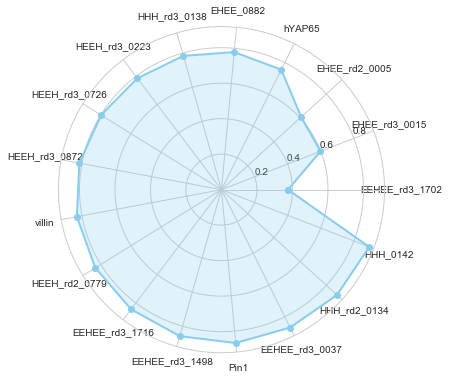

In [8]:
plot_style_utils.set_pub_plot_context(context="notebook")
cut_tmp = cut.avg
labels=cut_tmp.index
stats=cut_tmp.values

angles=np.linspace(0, 2.0*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)

In [9]:
# Use the full dataframe to pick the best performing baseline
all_df['rocklin_ssm2'][-1].sort_values(by="avg")



,avg,stdev
arnold_uniform_4_1,0.785115,0.012506
arnold_random_3_7,0.800568,0.010667
simple_freq_and_len,0.821452,0.010139
simple_freq_plus,0.823243,0.010422
64_final_hidden,0.835693,0.007425
arnold_scrambled_3_5,0.838157,0.009354
tfidf_3grams,0.843693,0.009289
arnold_original_3_7,0.844631,0.009474
3grams,0.845275,0.009384
64_final_cell,0.850746,0.008208


In [10]:
# Make a series of pearsonR for all_1900
dfs = all_df['rocklin_ssm2'][:-1] # drop the full
RGN_names = []
RGN_avgs = []
RGN_is_designed = []
for name,df in dfs.iteritems():
    print(name)
    if '.pdb' in name:
        RGN_is_designed.append(True)
    else:
        RGN_is_designed.append(False)
    name = name.split('_ssm2')[0].split(".")[0]
    print(name)
    RGN_names.append(name)
    RGN_avgs.append(df.avg.RGN)
    
print(RGN_names)
print(RGN_avgs)
print(RGN_is_designed)

EEHEE_rd3_0037.pdb_ssm2_stability
EEHEE_rd3_0037
EEHEE_rd3_1498.pdb_ssm2_stability
EEHEE_rd3_1498
EEHEE_rd3_1702.pdb_ssm2_stability
EEHEE_rd3_1702
EEHEE_rd3_1716.pdb_ssm2_stability
EEHEE_rd3_1716
EHEE_0882.pdb_ssm2_stability
EHEE_0882
EHEE_rd2_0005.pdb_ssm2_stability
EHEE_rd2_0005
EHEE_rd3_0015.pdb_ssm2_stability
EHEE_rd3_0015
HEEH_rd2_0779.pdb_ssm2_stability
HEEH_rd2_0779
HEEH_rd3_0223.pdb_ssm2_stability
HEEH_rd3_0223
HEEH_rd3_0726.pdb_ssm2_stability
HEEH_rd3_0726
HEEH_rd3_0872.pdb_ssm2_stability
HEEH_rd3_0872
HHH_0142.pdb_ssm2_stability
HHH_0142
HHH_rd2_0134.pdb_ssm2_stability
HHH_rd2_0134
HHH_rd3_0138.pdb_ssm2_stability
HHH_rd3_0138
Pin1_ssm2_stability
Pin1
hYAP65_ssm2_stability
hYAP65
villin_ssm2_stability
villin
['EEHEE_rd3_0037', 'EEHEE_rd3_1498', 'EEHEE_rd3_1702', 'EEHEE_rd3_1716', 'EHEE_0882', 'EHEE_rd2_0005', 'EHEE_rd3_0015', 'HEEH_rd2_0779', 'HEEH_rd3_0223', 'HEEH_rd3_0726', 'HEEH_rd3_0872', 'HHH_0142', 'HHH_rd2_0134', 'HHH_rd3_0138', 'Pin1', 'hYAP65', 'villin']
[0.7911289636

In [11]:
RGN_cut = pd.DataFrame({"avg":RGN_avgs, "is_designed":RGN_is_designed},
    index=names
                  ).loc[cut.index]
RGN_cut

,avg,is_designed
EEHEE_rd3_1702,0.714972,True
EHEE_rd3_0015,0.493098,True
EHEE_rd2_0005,0.465775,True
hYAP65,0.677070,False
EHEE_0882,0.588920,True
HHH_rd3_0138,0.703688,True
HEEH_rd3_0223,0.741333,True
HEEH_rd3_0726,0.822758,True
HEEH_rd3_0872,0.776487,True
villin,0.798844,False


EEHEE_rd3_1702    0.374862
EHEE_rd3_0015     0.598314
EHEE_rd2_0005     0.607761
hYAP65            0.755677
EHEE_0882         0.778605
HHH_rd3_0138      0.783899
HEEH_rd3_0223     0.786839
HEEH_rd3_0726     0.797881
HEEH_rd3_0872     0.815178
villin            0.828868
HEEH_rd2_0779     0.836261
EEHEE_rd3_1716    0.844751
EEHEE_rd3_1498    0.858217
Pin1              0.867599
EEHEE_rd3_0037    0.867736
HHH_rd2_0134      0.880745
HHH_0142          0.893018
Name: avg, dtype: float64
EEHEE_rd3_1702    0.714972
EHEE_rd3_0015     0.493098
EHEE_rd2_0005     0.465775
hYAP65            0.677070
EHEE_0882         0.588920
HHH_rd3_0138      0.703688
HEEH_rd3_0223     0.741333
HEEH_rd3_0726     0.822758
HEEH_rd3_0872     0.776487
villin            0.798844
HEEH_rd2_0779     0.729498
EEHEE_rd3_1716    0.802958
EEHEE_rd3_1498    0.850726
Pin1              0.738478
EEHEE_rd3_0037    0.791129
HHH_rd2_0134      0.771658
HHH_0142          0.860429
Name: avg, dtype: float64


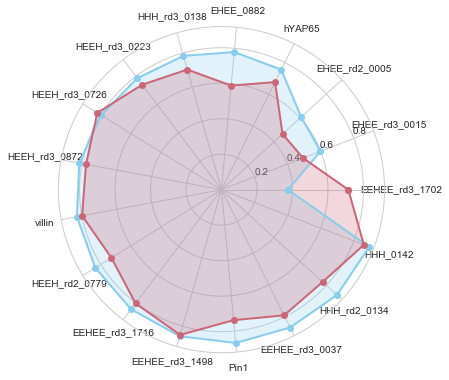

In [12]:
# Show RGN and UniRep
plot_style_utils.set_pub_plot_context(context="notebook")
palette = sns.color_palette()
cut_tmp = cut.copy().avg
print(cut_tmp)
labels=cut_tmp.index
stats=cut_tmp.values

angles=np.linspace(0, 2.0*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, color=palette[0])
ax.fill(angles, stats, alpha=0.25, color=palette[0])

cut_tmp = RGN_cut.copy().avg
print(cut_tmp)
labels=cut_tmp.index
stats=cut_tmp.values
angles=np.linspace(0, 2.0*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
ax.plot(angles, stats, 'o-', linewidth=2, color=palette[1])
ax.fill(angles, stats, alpha=0.25, color=palette[1])
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)

In [13]:
# Make a series of pearsonR for 2grams
dfs = all_df['rocklin_ssm2'][:-1] # drop the full
baseline_names = []
baseline_avgs = []
baseline_is_designed = []
for name,df in dfs.iteritems():
    print(name)
    if '.pdb' in name:
        baseline_is_designed.append(True)
    else:
        baseline_is_designed.append(False)
    name = name.split('_ssm2')[0].split(".")[0]
    print(name)
    baseline_names.append(name)
    baseline_avgs.append(df.avg['2grams'])
    
print(baseline_names)
print(baseline_avgs)
print(baseline_is_designed)

EEHEE_rd3_0037.pdb_ssm2_stability
EEHEE_rd3_0037
EEHEE_rd3_1498.pdb_ssm2_stability
EEHEE_rd3_1498
EEHEE_rd3_1702.pdb_ssm2_stability
EEHEE_rd3_1702
EEHEE_rd3_1716.pdb_ssm2_stability
EEHEE_rd3_1716
EHEE_0882.pdb_ssm2_stability
EHEE_0882
EHEE_rd2_0005.pdb_ssm2_stability
EHEE_rd2_0005
EHEE_rd3_0015.pdb_ssm2_stability
EHEE_rd3_0015
HEEH_rd2_0779.pdb_ssm2_stability
HEEH_rd2_0779
HEEH_rd3_0223.pdb_ssm2_stability
HEEH_rd3_0223
HEEH_rd3_0726.pdb_ssm2_stability
HEEH_rd3_0726
HEEH_rd3_0872.pdb_ssm2_stability
HEEH_rd3_0872
HHH_0142.pdb_ssm2_stability
HHH_0142
HHH_rd2_0134.pdb_ssm2_stability
HHH_rd2_0134
HHH_rd3_0138.pdb_ssm2_stability
HHH_rd3_0138
Pin1_ssm2_stability
Pin1
hYAP65_ssm2_stability
hYAP65
villin_ssm2_stability
villin
['EEHEE_rd3_0037', 'EEHEE_rd3_1498', 'EEHEE_rd3_1702', 'EEHEE_rd3_1716', 'EHEE_0882', 'EHEE_rd2_0005', 'EHEE_rd3_0015', 'HEEH_rd2_0779', 'HEEH_rd3_0223', 'HEEH_rd3_0726', 'HEEH_rd3_0872', 'HHH_0142', 'HHH_rd2_0134', 'HHH_rd3_0138', 'Pin1', 'hYAP65', 'villin']
[0.6192049545

In [14]:
baseline_cut = pd.DataFrame({"avg":baseline_avgs, "is_designed":baseline_is_designed},
    index=names
                  ).loc[cut.index]
baseline_cut

,avg,is_designed
EEHEE_rd3_1702,0.254302,True
EHEE_rd3_0015,0.325221,True
EHEE_rd2_0005,0.329355,True
hYAP65,0.505775,False
EHEE_0882,0.253453,True
HHH_rd3_0138,0.330546,True
HEEH_rd3_0223,0.563620,True
HEEH_rd3_0726,0.676028,True
HEEH_rd3_0872,0.476225,True
villin,0.630760,False


EEHEE_rd3_1702    0.374862
EHEE_rd3_0015     0.598314
EHEE_rd2_0005     0.607761
hYAP65            0.755677
EHEE_0882         0.778605
HHH_rd3_0138      0.783899
HEEH_rd3_0223     0.786839
HEEH_rd3_0726     0.797881
HEEH_rd3_0872     0.815178
villin            0.828868
HEEH_rd2_0779     0.836261
EEHEE_rd3_1716    0.844751
EEHEE_rd3_1498    0.858217
Pin1              0.867599
EEHEE_rd3_0037    0.867736
HHH_rd2_0134      0.880745
HHH_0142          0.893018
Name: avg, dtype: float64


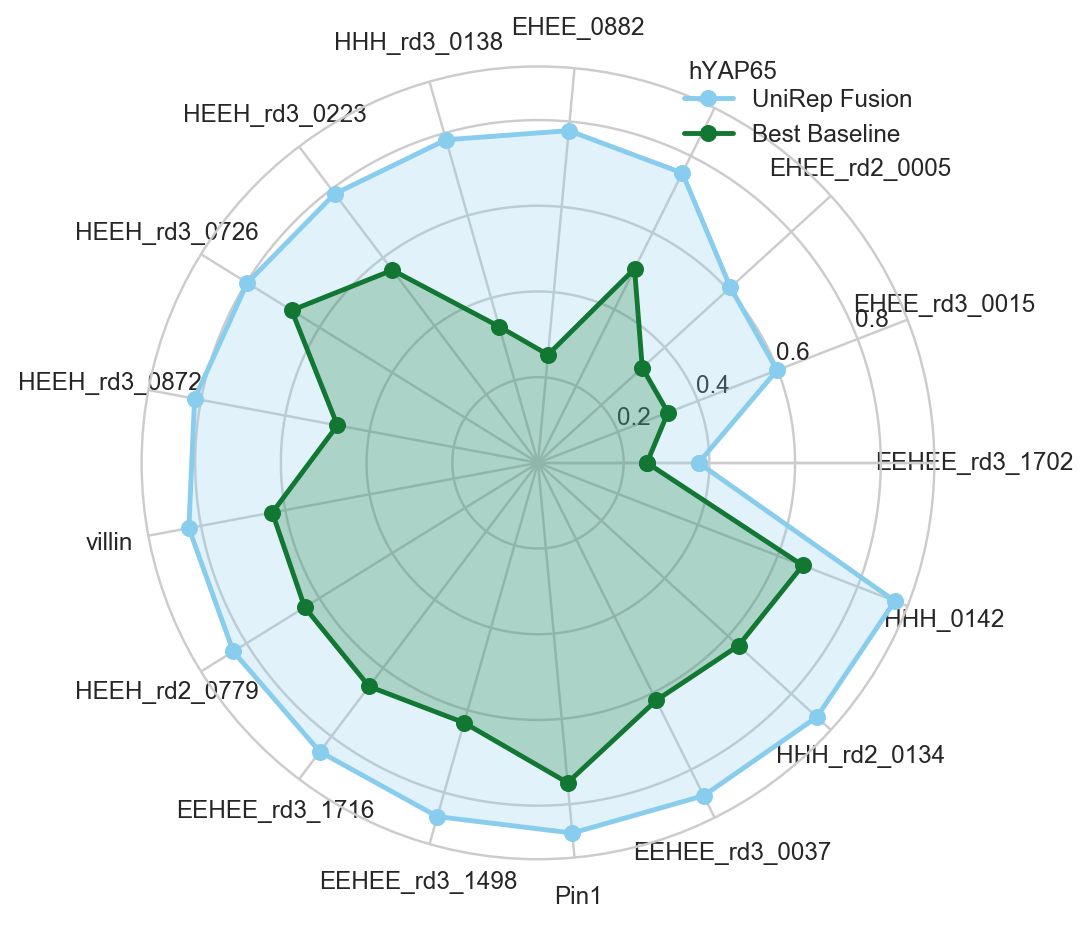

In [15]:
# Show UniRep and best baseline
plot_style_utils.set_pub_plot_context(context="notebook")
palette = sns.color_palette()
fig=plt.figure(figsize=(6,6), dpi=175)
ax = fig.add_subplot(111, polar=True)

cut_tmp = cut.copy().avg
print(cut_tmp)
labels=cut_tmp.index
stats=cut_tmp.values

angles=np.linspace(0, 2.0*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

ax.plot(angles, stats, 'o-', linewidth=2, color=palette[0], label="UniRep Fusion")
ax.fill(angles, stats, alpha=0.25, color=palette[0])

cut_tmp = baseline_cut.copy().avg
#print(cut_tmp)
labels=cut_tmp.index
stats=cut_tmp.values
angles=np.linspace(0, 2.0*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
ax.plot(angles, stats, 'o-', linewidth=2, color=palette[3], label="Best Baseline")
ax.fill(angles, stats, alpha=0.25, color=palette[3])
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)
ax.legend()
plot_style_utils.save_for_pub(fig=fig, path='./img/b', dpi=175)
# Will fix label sizing in post